In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb as db
import plotly as ply
import plotly.express as px

In [2]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.describe()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,2021-06-17 19:32:22.882282752,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
min,2020-03-01 00:00:00,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-11-03 00:00:00,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,2021-06-18 00:00:00,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,2022-01-31 00:00:00,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,2022-09-16 00:00:00,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000
std,NaN,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755


In [6]:
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

New Cases per Million : Formula: (New Cases / Population) * 1000000

Total Cases per Million : Formula: (Total Cases / Population) * 1000000

New Deaths per Million : (New Deaths / Population) * 1000000

Total Deaths per Million : Formula: (Total Deaths / Population) * 1000000

Total Deaths per 100rb : Formula: (Total Deaths / Total Cases) * 100

Case Fatality Rate : Formula: (Total Recovered / Total Cases) * 100

Case Recovered Rate : Under 1 means decrease, 1 means flat, above 1 means increase. Formula: Today New Recovered Cases / Yesterday New Recovered Cases

Growth Factor of New Cases : Under 1 means decrease, 1 means flat, above 1 means increase. Formula: Today New Cases / Yesterday New Cases

Growth Factor of New Deaths Under 1 means decrease, 1 means flat, above 1 means increase. Formula: Today New Deaths / Yesterday New Deaths

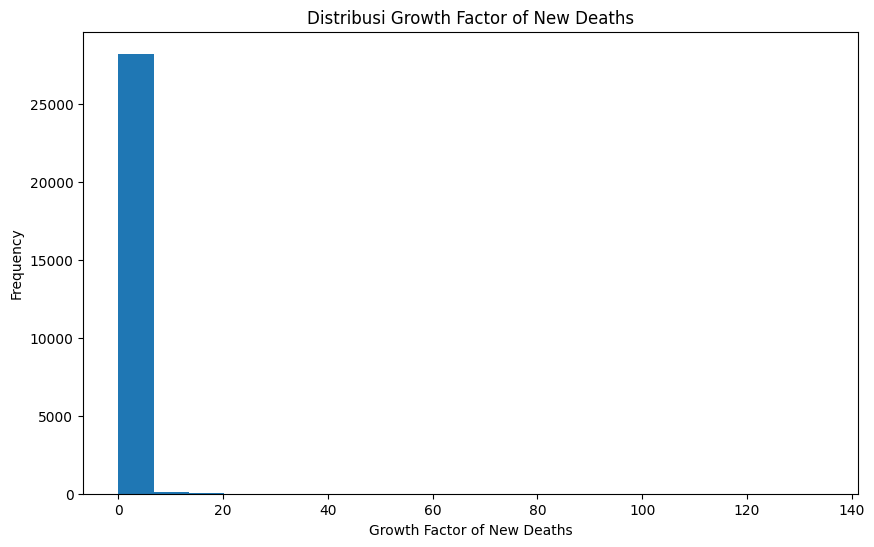

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['Growth Factor of New Deaths'], bins=20)
plt.title('Distribusi Growth Factor of New Deaths')
plt.xlabel('Growth Factor of New Deaths')
plt.ylabel('Frequency')
plt.show()

In [8]:
df['Growth Factor of New Deaths'].fillna(value=df['Growth Factor of New Deaths'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\245942050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Growth Factor of New Deaths'].fillna(value=df['Growth Factor of New Deaths'].median(), inplace=True)


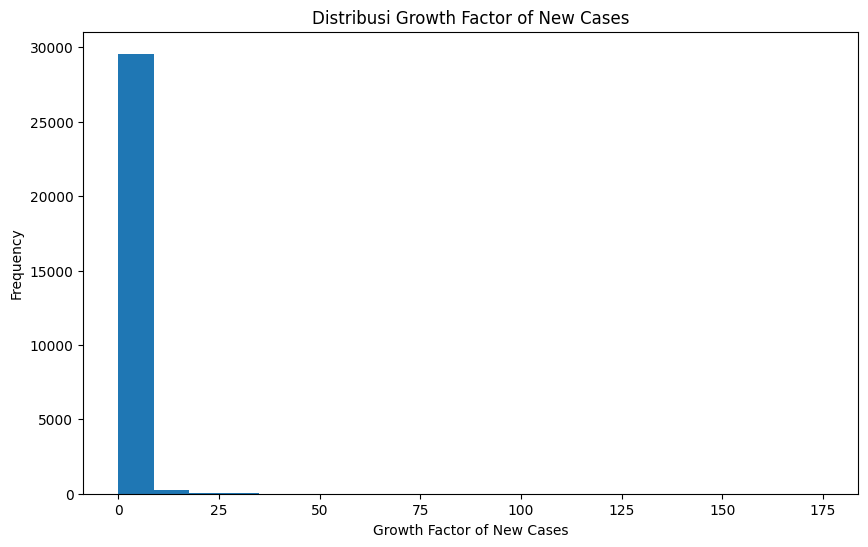

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Growth Factor of New Cases'], bins=20)
plt.title('Distribusi Growth Factor of New Cases')
plt.xlabel('Growth Factor of New Cases')
plt.ylabel('Frequency')
plt.show()

In [10]:
df['Growth Factor of New Cases'].fillna(value=df['Growth Factor of New Cases'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\257071611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Growth Factor of New Cases'].fillna(value=df['Growth Factor of New Cases'].median(), inplace=True)


In [11]:
# Mengelompokkan data berdasarkan provinsi dan menghitung jumlah nilai yang hilang dalam setiap provinsi
missing_rural_villages_by_province = df[df['Total Rural Villages'].isnull()].groupby('Province').size()

# Menampilkan provinsi-provinsi yang memiliki nilai yang hilang dalam kolom 'Total Rural Villages'
print("Provinsi-provinsi yang memiliki nilai yang hilang dalam kolom 'Total Rural Villages':")
print(missing_rural_villages_by_province)

Provinsi-provinsi yang memiliki nilai yang hilang dalam kolom 'Total Rural Villages':
Province
DKI Jakarta    929
dtype: int64


In [12]:
df['Total Rural Villages'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\296860305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Rural Villages'].fillna(0, inplace=True)


In [13]:
df['Total Urban Villages'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\886418456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Urban Villages'].fillna(0, inplace=True)


In [14]:
from geopy.geocoders import Nominatim

In [15]:
df.loc[10].to_dict()

{'Date': Timestamp('2020-03-04 00:00:00'),
 'Location ISO Code': 'ID-JB',
 'Location': 'Jawa Barat',
 'New Cases': 1,
 'New Deaths': 0,
 'New Recovered': 0,
 'New Active Cases': 1,
 'Total Cases': 2,
 'Total Deaths': 1,
 'Total Recovered': 60,
 'Total Active Cases': -59,
 'Location Level': 'Province',
 'City or Regency': nan,
 'Province': 'Jawa Barat',
 'Country': 'Indonesia',
 'Continent': 'Asia',
 'Island': 'Jawa',
 'Time Zone': 'UTC+07:00',
 'Special Status': nan,
 'Total Regencies': 18,
 'Total Cities': 9.0,
 'Total Districts': 627,
 'Total Urban Villages': 645.0,
 'Total Rural Villages': 5312.0,
 'Area (km2)': 35378,
 'Population': 45161325,
 'Population Density': 1276.55,
 'Longitude': 107.6037083,
 'Latitude': -6.920432083,
 'New Cases per Million': 0.02,
 'Total Cases per Million': 0.04,
 'New Deaths per Million': 0.0,
 'Total Deaths per Million': 0.02,
 'Total Deaths per 100rb': 0.0,
 'Case Fatality Rate': '50.00%',
 'Case Recovered Rate': '3000.00%',
 'Growth Factor of New Ca

In [16]:
coord = df['Latitude'] [10], df['Longitude'] [10]
coordinates = f'{coord[0]},{coord[1]}'
coordinates

'-6.920432083,107.6037083'

In [17]:
geolocator = Nominatim(user_agent="PythonDataAnalyst") 
location= geolocator.reverse(coordinates)
location.raw

{'place_id': 25470864,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 4567664,
 'lat': '-6.9207474618230025',
 'lon': '107.60366747132613',
 'class': 'highway',
 'type': 'primary',
 'place_rank': 26,
 'importance': 0.0533433333333333,
 'addresstype': 'road',
 'name': 'Jalan Jendral Sudirman',
 'display_name': 'Jalan Jendral Sudirman, Karanganyar, Astanaanyar, Bandung, Jawa Barat, Jawa, 40181, Indonesia',
 'address': {'road': 'Jalan Jendral Sudirman',
  'village': 'Karanganyar',
  'subdistrict': 'Astanaanyar',
  'city': 'Bandung',
  'state': 'Jawa Barat',
  'ISO3166-2-lvl4': 'ID-JB',
  'region': 'Jawa',
  'ISO3166-2-lvl3': 'ID-JW',
  'postcode': '40181',
  'country': 'Indonesia',
  'country_code': 'id'},
 'boundingbox': ['-6.9208034', '-6.9205800', '107.6022243', '107.6040992']}

In [18]:
print(location)
print(type(location))

Jalan Jendral Sudirman, Karanganyar, Astanaanyar, Bandung, Jawa Barat, Jawa, 40181, Indonesia
<class 'geopy.location.Location'>


In [19]:
def search_city (latitude:float, longitude:float)-> str:
    geolocator = Nominatim(user_agent="PythonDataAnalyst", timeout=5)
    coordinates = f'{latitude}, {longitude}'
    location = geolocator.reverse(coordinates)
    return location.raw.get('address',{}).get('city','')

In [20]:
print(search_city(-6.9207474618230025,107.60366747132613))

Bandung


In [21]:
null_city = list(df[['Latitude', 'Longitude']].values)
counter = 1
city_code = {}

for counter, location in enumerate(null_city, start=1):
    location_key = f'{location[0]}/{location[1]}'
    if location_key not in city_code:
        city = search_city(location[0], location[1])
        city_code[location_key] = city
    print(f"Detection location {counter} for {location} -> {city_code[location_key]}")
    counter+=1

Detection location 1 for [ -6.20469899 106.8361183 ] -> Daerah Khusus Jakarta
Detection location 2 for [ -6.20469899 106.8361183 ] -> Daerah Khusus Jakarta
Detection location 3 for [ -0.789275 113.921327] -> 
Detection location 4 for [  0.51164785 101.8051092 ] -> 
Detection location 5 for [ -6.20469899 106.8361183 ] -> Daerah Khusus Jakarta
Detection location 6 for [ -0.789275 113.921327] -> 
Detection location 7 for [ -6.92043208 107.6037083 ] -> Bandung
Detection location 8 for [  0.51164785 101.8051092 ] -> 
Detection location 9 for [ -6.20469899 106.8361183 ] -> Daerah Khusus Jakarta
Detection location 10 for [ -0.789275 113.921327] -> 
Detection location 11 for [ -6.92043208 107.6037083 ] -> Bandung
Detection location 12 for [  0.51164785 101.8051092 ] -> 
Detection location 13 for [ -6.20469899 106.8361183 ] -> Daerah Khusus Jakarta
Detection location 14 for [ -0.789275 113.921327] -> 
Detection location 15 for [ -6.92043208 107.6037083 ] -> Bandung
Detection location 16 for [  

In [22]:
import json

In [23]:
with open("city_code.json", "w") as outfile:
    json.dump(city_code, outfile, indent=4)

In [24]:
with open("city_code.json", "r") as my_city:
    city_code =json.load(my_city)
city_code

{'-6.204698991/106.8361183': 'Daerah Khusus Jakarta',
 '-0.789275/113.921327': '',
 '0.511647851/101.8051092': '',
 '-6.920432083/107.6037083': 'Bandung',
 '-6.456736388/106.1090043': '',
 '-7.259097177/110.2011149': '',
 '-4.124688793/122.070311': '',
 '-8.369471688/115.1317136': '',
 '0.45385803/116.4684405': '',
 '-7.89450185/110.4448783': '',
 '2.191894453/99.05196442': '',
 '-7.723345579/112.7329414': '',
 '3.916346/108.261746': '',
 '-3.731080714/120.1620559': '',
 '-1.69769766/102.7236404': '',
 '-3.192572/129.576792': '',
 '-4.66620953/138.69603': '',
 '0.212036949/127.5391072': '',
 '-3.216211808/104.1694647': '',
 '4.225614628/96.91052174': '',
 '-1.602484653/113.4176536': '',
 '-4.916792975/105.0214366': '',
 '-1.00413668/121.2010927': '',
 '1.259638212/124.5212396': '',
 '-0.850253225/100.4650624': 'Padang',
 '-2.045160182/132.9762624': '',
 '2.891012621/116.2188791': '',
 '-2.461746053/119.3450194': '',
 '-0.086474572/111.1211776': '',
 '-2.993594979/115.4385783': '',
 '-2

In [25]:
df['City or Regency'] = df.apply(
    lambda rows: city_code.get(f"{rows['Latitude']}/{rows['Longitude']}", None) if pd.isna(rows["City or Regency"]) else rows["City or Regency"],
    axis=1)

In [26]:
df.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                    0
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages               0
Total Rural Villages               0
Area (km2)                         0
Population                         0
Population Density                 0
L

In [27]:
missing_province_locations = df[df['Province'].isnull()].groupby('Location').size()
missing_province_locations

Location
Indonesia    929
dtype: int64

In [28]:
missing_island = df[df['Island'].isnull()].groupby('Location').size()
missing_island

Location
Indonesia    929
dtype: int64

In [29]:
missing_timezone = df[df['Time Zone'].isnull()].groupby('Location').size()
missing_timezone

Location
Indonesia    929
dtype: int64

In [30]:
missing_totalcities = df[df['Total Cities'].isnull()].groupby('Location').size()
missing_totalcities

Location
Sulawesi Barat    901
dtype: int64

In [31]:
df['Province'].fillna('Unknown', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\4072647954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province'].fillna('Unknown', inplace=True)


In [32]:
df['Island'].fillna('Unknown', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\1532205373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Island'].fillna('Unknown', inplace=True)


In [33]:
df['Time Zone'].fillna('Unknown', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\441500603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time Zone'].fillna('Unknown', inplace=True)


In [34]:
df['Total Cities'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10504\2068157782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Cities'].fillna(0, inplace=True)


In [35]:
df.drop(columns=['Special Status'], inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         31822 non-null  datetime64[ns]
 1   Location ISO Code            31822 non-null  object        
 2   Location                     31822 non-null  object        
 3   New Cases                    31822 non-null  int64         
 4   New Deaths                   31822 non-null  int64         
 5   New Recovered                31822 non-null  int64         
 6   New Active Cases             31822 non-null  int64         
 7   Total Cases                  31822 non-null  int64         
 8   Total Deaths                 31822 non-null  int64         
 9   Total Recovered              31822 non-null  int64         
 10  Total Active Cases           31822 non-null  int64         
 11  Location Level               31822 non-nu

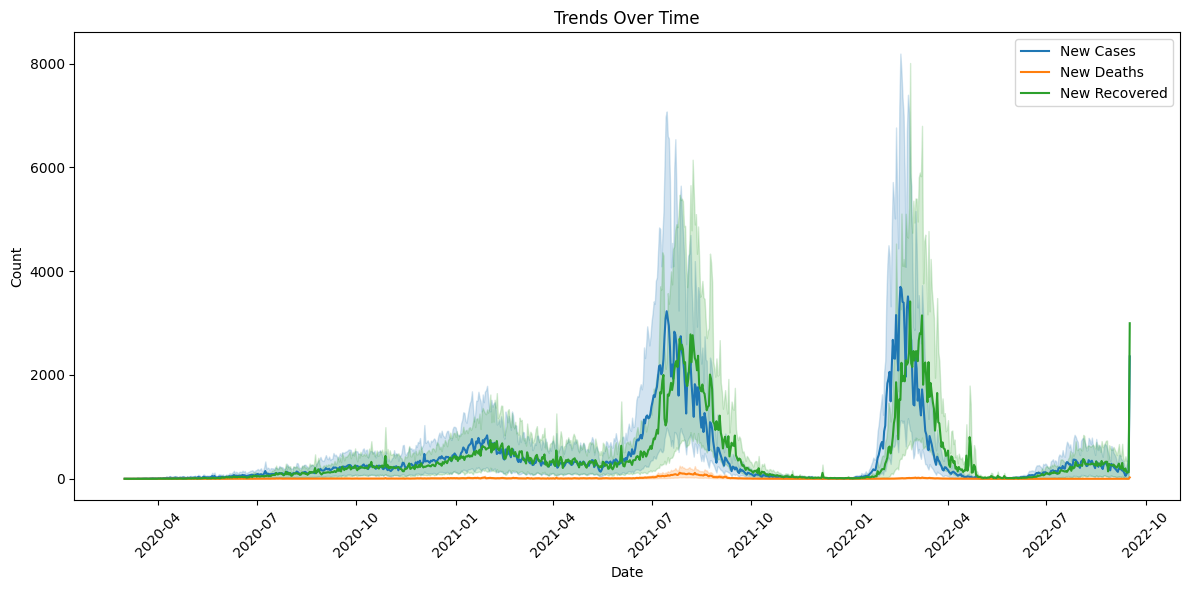

In [37]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='New Cases', label='New Cases')
sns.lineplot(data=df, x='Date', y='New Deaths', label='New Deaths')
sns.lineplot(data=df, x='Date', y='New Recovered', label='New Recovered')
plt.title('Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [38]:
total_cases_per_location = df.groupby('Location')['Total Cases'].max()

In [39]:
top5_most_cases = total_cases_per_location.nlargest(5)

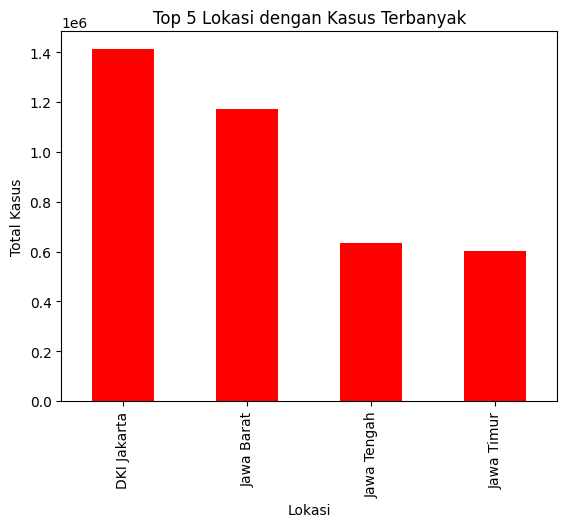

In [40]:
top5_most_cases[top5_most_cases.index != 'Indonesia'].plot(kind='bar', color='red')
plt.title('Top 5 Lokasi dengan Kasus Terbanyak')
plt.xlabel('Lokasi')
plt.ylabel('Total Kasus')
plt.show()

In [41]:
top5_least_cases = total_cases_per_location.nsmallest(5)

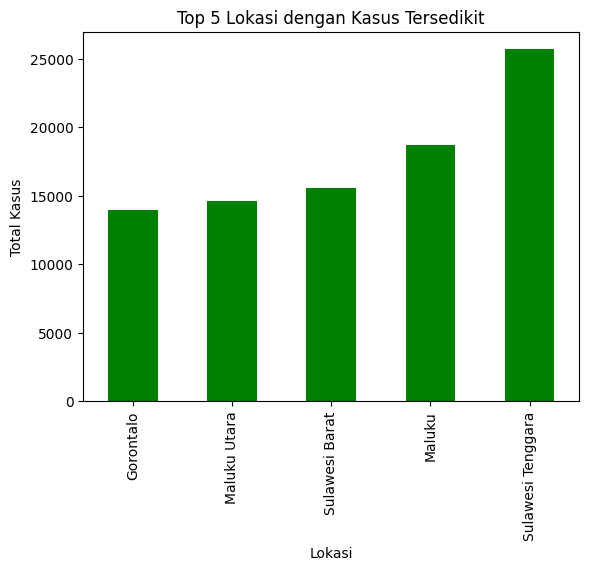

In [42]:
top5_least_cases.plot(kind='bar', color='green')
plt.title('Top 5 Lokasi dengan Kasus Tersedikit')
plt.xlabel('Lokasi')
plt.ylabel('Total Kasus')
plt.show()

In [43]:
fig = px.bar(x=top5_least_cases.index, y=top5_least_cases.values, color=top5_least_cases.values,
             labels={'x': 'Lokasi', 'y': 'Total Kasus'}, color_continuous_scale='greens')
fig.update_traces(text=top5_least_cases.values, textposition='outside')
fig.show()

In [44]:
total_per_island = df.groupby('Island').agg({'Total Cases': 'sum', 'Total Deaths': 'sum','Total Recovered': 'sum'})

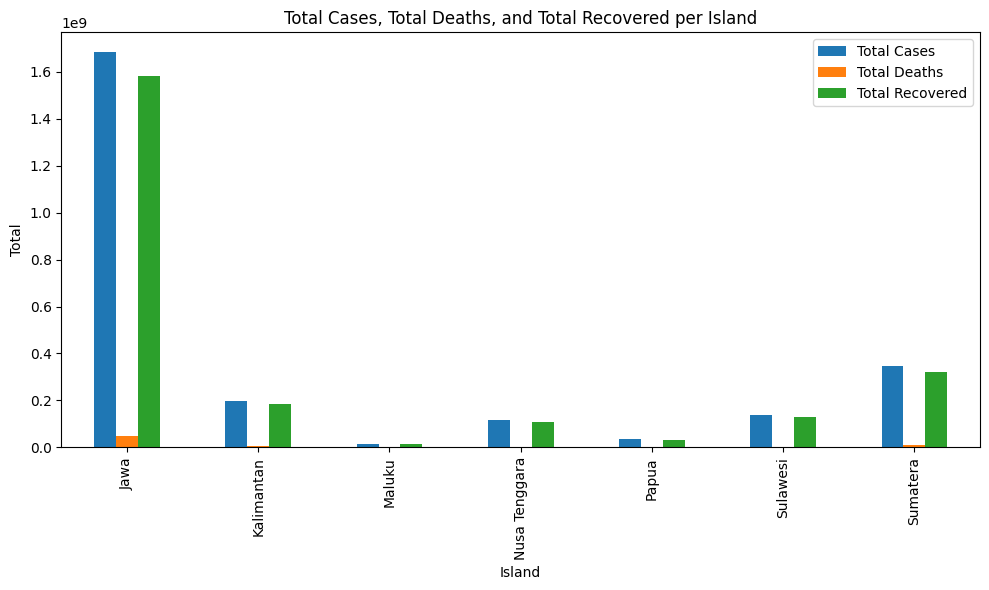

In [45]:
total_per_island[total_per_island.index != 'Unknown'].plot(kind='bar', figsize=(10, 6))
plt.title('Total Cases, Total Deaths, and Total Recovered per Island')
plt.xlabel('Island')
plt.ylabel('Total')
plt.tight_layout()
plt.show()

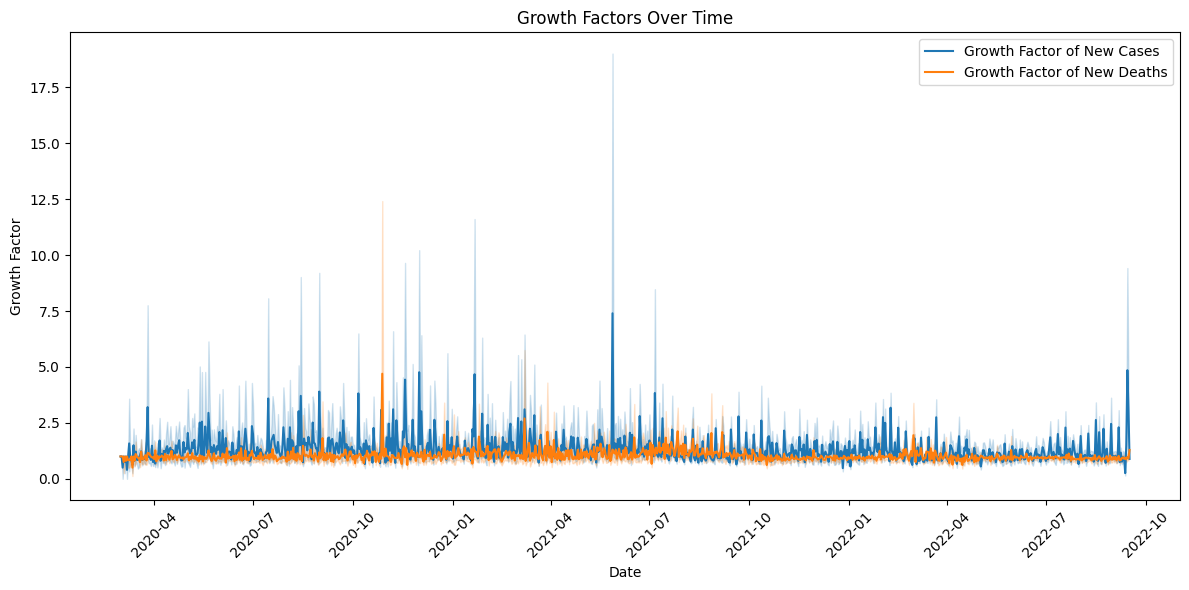

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Growth Factor of New Cases', label='Growth Factor of New Cases')
sns.lineplot(data=df, x='Date', y='Growth Factor of New Deaths', label='Growth Factor of New Deaths')
plt.title('Growth Factors Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Factor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [47]:
list_label = ['Active Cases', 'Recovered Cases', 'Deaths']
list_value = [df['Total Active Cases'].sum(), df['Total Recovered'].sum(), df['Total Deaths'].sum()]

fig = ply.graph_objs.Figure(
    data=[ply.graph_objs.Pie(labels=list_label, values=list_value)]
)
fig.update_layout(title_text='Total Case Covid 19 di Indonesia')
fig.show()

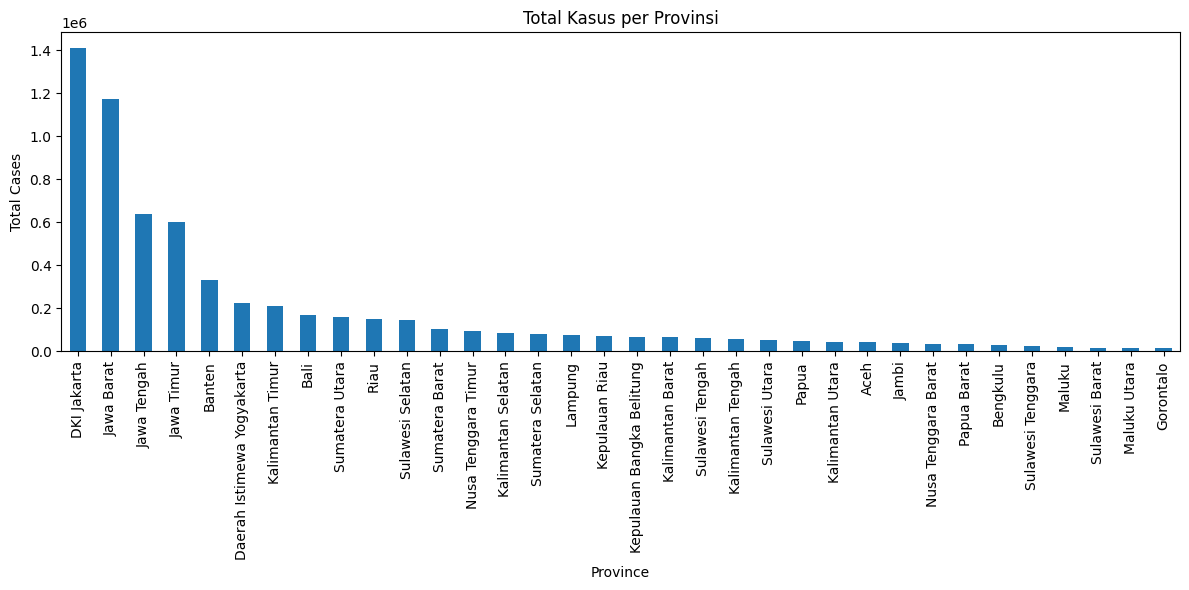

In [51]:
plt.figure(figsize=(12, 6))
total_cases_per_province = df.groupby('Province')['Total Cases'].max().sort_values(ascending=False)
total_cases_per_province[total_cases_per_province.index != 'Unknown'].plot(kind='bar')
plt.title('Total Kasus per Provinsi')
plt.xlabel('Province')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

In [ ]:
province_name = 'Sumatera Selatan'
province_data = df[df['Province'] == province_name]
total_cases_province = province_data['Total Cases'].max()
total_cases_province

82198